In [1]:
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from pickle import dump
from pickle import load

In [2]:
data=read_csv("diabetes.csv")

In [3]:
data.head(4)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [4]:
array = data.values
X = array[:, 0:-1]
Y = array[:, -1]


In [5]:
# PCA, KNN, Clustring 

"""

1,2,3,7


1--> (1-1)/(7-1) =0
2--> (2-1)/(7-1) =1/6
3--> (3-1)/(7-1) =2/6
7--> (7-1)/(7-1) =1


"""


'\n\n1,2,3,7\n\n\n1--> (1-1)/(7-1) =0\n2--> (2-1)/(7-1) =1/6\n3--> (3-1)/(7-1) =2/6\n7--> (7-1)/(7-1) =1\n\n\n'

In [6]:
scaler = MinMaxScaler()

scaler.fit(X)

X=scaler.transform(X)

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=12)

# chose the best value of k

In [8]:
"""

train and test

for k in range(1,40,2):

    KNN(k) ---> train
    evaluate on test 
    

best value of k or which we get the best score on test data


CV 

train-> t1,t2,t3,t4,t5

for k in range(1,40,2):
    model1-> (t1,t2,t3,t4) test-> t5 s1
    model2-> (t1,t2,t3,t5) test-> t4 s2
    model3-> (t1,t2,t4,t5) test-> t3 s3
    model4-> (t1,t3,t4,t5) test-> t2 s4
    model5-> (t2,t3,t4,t5) test-> t1 s5


    overall=(s1+s2+s3+S4+s5)/5

best value of k for which we get the best overall score 

"""

'\n\ntrain and test\n\nfor k in range(1,40,2):\n\n    KNN(k) ---> train\n    evaluate on test \n    \n\nbest value of k or which we get the best score on test data\n\n\nCV \n\ntrain-> t1,t2,t3,t4,t5\n\nfor k in range(1,40,2):\n    model1-> (t1,t2,t3,t4) test-> t5 s1\n    model2-> (t1,t2,t3,t5) test-> t4 s2\n    model3-> (t1,t2,t4,t5) test-> t3 s3\n    model4-> (t1,t3,t4,t5) test-> t2 s4\n    model5-> (t2,t3,t4,t5) test-> t1 s5\n\n\n    overall=(s1+s2+s3+S4+s5)/5\n\nbest value of k for which we get the best overall score \n\n'

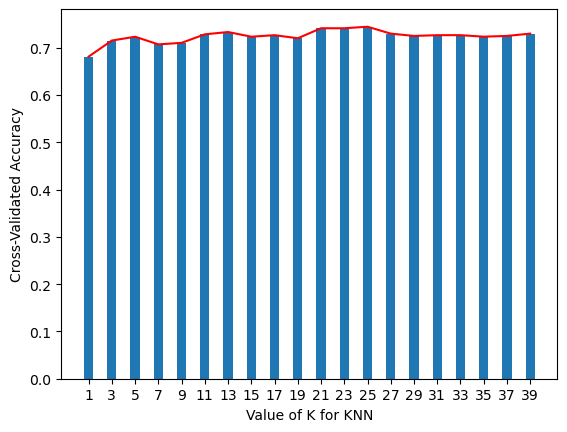

In [9]:

import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 39
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

In [10]:
scores=pd.DataFrame()
scores["K_values"]=k_range
scores["Scores"]=k_scores
scores.sort_values(["Scores"],ascending=False)

,K_values,Scores
12,25,0.744236
10,21,0.741010
11,23,0.741010
6,13,0.733025
13,27,0.729640
19,39,0.729640
5,11,0.728160
16,33,0.726388
8,17,0.726362
15,31,0.726362


# build final model

In [11]:
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
accuracy_score(y_test,pred)

0.8051948051948052

In [12]:
dump(knn, open('knn.sav', 'wb'))
dump(scaler, open('scaler.sav', 'wb'))

In [13]:
loaded_model = load(open('knn.sav', 'rb'))
result = loaded_model.score(X, Y)
print(result)

0.7669270833333334


In [14]:
np.reshape([1,2,3,4,5,6,7,8],(1,-1))

array([[1, 2, 3, 4, 5, 6, 7, 8]])

In [15]:
loaded_model.predict(np.reshape([1,2,3,4,5,6,7,8],(1,8)))[0]

1.0

In [16]:
import numpy as np



In [17]:
l=[1,2,3,5,5]

np.array(l)

array([1, 2, 3, 5, 5])

In [18]:
np.array(l).reshape(1,-1).shape

(1, 5)

In [19]:
import sklearn

sklearn.__version__

'1.0.2'

# deploy the model

In [21]:
pip install streamlit

     ---------------------------------------- 9.7/9.7 MB 236.5 kB/s eta 0:00:00
     -------------------------------------- 20.6/20.6 MB 292.2 kB/s eta 0:00:00
     ---------------------------------------- 4.7/4.7 MB 1.0 MB/s eta 0:00:00
     ------------------------------------ 164.8/164.8 kB 898.7 kB/s eta 0:00:00
     -------------------------------------- 238.7/238.7 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 904.2/904.2 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 813.6/813.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 184.3/184.3 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 62.7/62.7 kB ? eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 84.5/84.5 kB 1.2 MB/s eta 0:00:00
     ------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.


In [ ]:
!streamlit run appupdated.py

In [22]:
import sklearn
sklearn.__version__

'1.0.2'

In [23]:
import streamlit
streamlit.__version__

'1.21.0'

In [24]:
x=10
y=10

In [25]:
id(x)

3157823351376

In [26]:
id(y)

3157823351376